# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

**NOTE:** The DataFrame used in this Analysis is Filtered on the negatively commented users & the negative text and keywords used from the comments analysis

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have two main datasets**: <br>
>(The datasets screaped from **Instagram**).
> - 1- A dataset with posts data.
> - 2- A dataset with comments data.

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
import pickle

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, draw_heatmap, facet_heat, facet_days, SameText

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline

In [2]:
os.chdir("../Data")

In [3]:
df_posts = pd.read_csv("posts_cleaned.csv")
print(df_posts.shape)
df_posts.head()

(193967, 7)


,id,is_video,caption,location,user_id,username,account_url
0,2312672024680952662,False,According to the Digital trends: Visual effect...,Hollywood,32529918546,cinescenes_,https://www.instagram.com/cinescenes_
1,2337634847974873162,False,My girl❤️,NaN,3988263563,scarlettjohansonoffcial,https://www.instagram.com/scarlettjohansonoffcial
2,2383123126627446477,False,❤❤❤\n#eizagonzalez #alexandradaddario\n#jennif...,"Los Angeles, California",38331031416,divine.hollywood.women,https://www.instagram.com/divine.hollywood.women
3,2389292367830952143,False,Use #KarenGillanslover \nThe smile kills me.😍😍...,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover
4,2484525220804152653,False,.\nجانی دپ به دنبال پروژه\u200cای جدید جهت نقش...,NaN,7105766142,cinemafars.official,https://www.instagram.com/cinemafars.official


In [4]:
df_comments = pd.read_csv("comments_cleaned.csv")
print(df_comments.shape)
df_comments.head()

(1751113, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
1,🔥🔥❤️,2020-06-23 06:50:20,17845867817208020,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
2,very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,2020-06-23 06:54:04,17889474637566402,0.0,0.0,2337634847974873088,n,12302008022,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,2020,Jun,23,2020-06-23,6
3,❤️❤️❤️❤️❤️❤️,2020-06-23 07:12:28,17869498675832482,0.0,0.0,2337634847974873088,n,2490417195,muataz_87,False,https://www.instagram.com/muataz_87,2020,Jun,23,2020-06-23,7
4,bombón bello 💖💖💖💖💖,2020-06-23 07:14:40,18066076495222844,0.0,0.0,2337634847974873088,n,1521544054,jorgero122129,False,https://www.instagram.com/jorgero122129,2020,Jun,23,2020-06-23,7


## Negative Text

In [5]:
# To Load the dictionary of negative text   

import pickle
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f)
    
neg_text = set()
for key in neg_dict.keys():
    neg_text.add(key)
    
neg_text 

{' death',
 ' death ',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violence',
 'expos',
 'exposing her ass',
 'exposingamberheard',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamber',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @am

## Filter the data frame on Comments containing negative keywords

In [6]:
df_comments_neg = df_comments[df_comments.message.str.contains('|'.join(neg_text))]
print(df_comments_neg.shape)
df_comments_neg.head()

(58594, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
157,#ambertheabuser #justiceforjohnnydepp,2020-04-20 01:03:09,17924309752391120,0.0,1.0,2285143072186506496,n,1637061353,pauu.eg,False,https://www.instagram.com/pauu.eg,2020,Apr,20,2020-04-20,1
171,"jason momoa ist der grund, weshalb aquaman all...",2018-12-27 16:59:45,17984212993148172,0.0,0.0,1943663541275322368,n,286745995,joker.reviews,False,https://www.instagram.com/joker.reviews,2018,Dec,27,2018-12-27,16
288,@shoe7979 it wasnt the role that killed him. i...,2018-09-24 11:18:20,17955816031133268,NaN,1.0,1875351868890582528,17978156986067024,5514629148,madmaxmcvey,True,https://www.instagram.com/madmaxmcvey,2018,Sep,24,2018-09-24,11
399,no thanks crazy bitch. u been off the list a...,2021-02-12 18:11:26,17899112170790540,0.0,0.0,2507566752144024576,n,8585010402,gwill6969,False,https://www.instagram.com/gwill6969,2021,Feb,12,2021-02-12,18
542,he is disgusting messing with 12's years old girl,2018-05-29 13:08:05,17922112792130772,0.0,0.0,1785083206309434368,n,1953412513,viapianabruna,False,https://www.instagram.com/viapianabruna,2018,May,29,2018-05-29,13


In [7]:
df_comments_neg.message.value_counts().head(10)

#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                               432
abuser                                                                                                                                                                                                                                                                                                                                                                                              346
bitch                                                                                                                                                                                                                   

## Negative Users

In [8]:
# To Load the dictionary negative commented users

with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [9]:
len(neg_users)

14511

## Filter the data frame on usernames commented negatively

In [10]:
df_comments_sub2 = df_comments[df_comments.username.isin(neg_users)]
print(df_comments_sub2.shape)
df_comments_sub2.head()

(114479, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
55,vergogna è sui siti porno,2020-11-07 20:16:31,17883706135825596,0.0,0.0,2436331638714282496,n,14801673870,patriziatroiani,False,https://www.instagram.com/patriziatroiani,2020,Nov,7,2020-11-07,20
118,#scarlettjohansson #vanessahudgens #emmastone ...,2021-06-26 16:26:16,18049672492291688,0.0,0.0,2604641913295835136,n,33406416831,alexandrradaddario_,False,https://www.instagram.com/alexandrradaddario_,2021,Jun,26,2021-06-26,16
157,#ambertheabuser #justiceforjohnnydepp,2020-04-20 01:03:09,17924309752391120,0.0,1.0,2285143072186506496,n,1637061353,pauu.eg,False,https://www.instagram.com/pauu.eg,2020,Apr,20,2020-04-20,1
171,"jason momoa ist der grund, weshalb aquaman all...",2018-12-27 16:59:45,17984212993148172,0.0,0.0,1943663541275322368,n,286745995,joker.reviews,False,https://www.instagram.com/joker.reviews,2018,Dec,27,2018-12-27,16
173,@jens_dgb ganz so hart würde ichs jetzt nicht ...,2018-12-27 17:35:54,17915479141263112,NaN,0.0,1943663541275322368,18014241583020016,286745995,joker.reviews,True,https://www.instagram.com/joker.reviews,2018,Dec,27,2018-12-27,17


In [11]:
df_comments_sub2.message.value_counts().head(10)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                              1675
#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                                               428
abuser                                                                                                                                                                                  

## Merge Both DataFrames (negative text and negative users)

In [12]:
df_comments_sub = pd.concat([df_comments_neg,df_comments_sub2]).drop_duplicates().reset_index(drop=True)
print(df_comments_sub.shape)
df_comments_sub.head()

(142175, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#ambertheabuser #justiceforjohnnydepp,2020-04-20 01:03:09,17924309752391120,0.0,1.0,2285143072186506496,n,1637061353,pauu.eg,False,https://www.instagram.com/pauu.eg,2020,Apr,20,2020-04-20,1
1,"jason momoa ist der grund, weshalb aquaman all...",2018-12-27 16:59:45,17984212993148172,0.0,0.0,1943663541275322368,n,286745995,joker.reviews,False,https://www.instagram.com/joker.reviews,2018,Dec,27,2018-12-27,16
2,@shoe7979 it wasnt the role that killed him. i...,2018-09-24 11:18:20,17955816031133268,NaN,1.0,1875351868890582528,17978156986067024,5514629148,madmaxmcvey,True,https://www.instagram.com/madmaxmcvey,2018,Sep,24,2018-09-24,11
3,no thanks crazy bitch. u been off the list a...,2021-02-12 18:11:26,17899112170790540,0.0,0.0,2507566752144024576,n,8585010402,gwill6969,False,https://www.instagram.com/gwill6969,2021,Feb,12,2021-02-12,18
4,he is disgusting messing with 12's years old girl,2018-05-29 13:08:05,17922112792130772,0.0,0.0,1785083206309434368,n,1953412513,viapianabruna,False,https://www.instagram.com/viapianabruna,2018,May,29,2018-05-29,13


In [13]:
df_comments_sub.message.value_counts().head(20)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                              1675
#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                                               432
abuser                                                                                                                                                                                  

In [14]:
df_comments_sub.username.value_counts().head(25)

kurilka_dzen            4006
razaopetraglia          2624
pineros.fabito          1155
_dope_black_unicorn_    1134
kennethzawadzinski      1102
ariffin785              1080
tayabnacer              1005
kimidepp20               964
marvel.dc.and.more       859
ticetm6                  665
ohgodnotsimone           663
amber_sun_kgd            638
ryan_swift_bat13         560
amberheardit             529
jd_sweetprince           520
natchayaleejin           479
dceu_family              463
goldensamfraser          443
naye6504                 426
annalena_1963            398
veysel.durmus1967        397
siamakyaghobzadeh        392
captainkayceecosplay     387
samanthastar53           385
imnicolekidmanfan        383
Name: username, dtype: int64

<a id='sahar'></a>
###  sahartaleb___
<ul>
<li><a href="#sahar">sahartaleb___</a></li>

</ul>

In [15]:
f'this user made {df_posts[df_posts.username == "sahartaleb___"].shape[0]} posts'

'this user made 0 posts'

In [16]:
f'this user made {df_comments[df_comments.username == "sahartaleb___"].shape[0]} comments'

'this user made 112 comments'

In [17]:
df_comments[df_comments.username == "sahartaleb___"].message.value_counts()

#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard                                     26
#justiceforjohnnydepp                                                                                                                                                                                                                                                        7
💩💩💩💩                                                                                                                                                                                                                                                                         4
red💪🏻                                                                                                                                                                                      

In [18]:
df_sahar = df_comments[df_comments.username == "sahartaleb___"]

In [19]:
sahar_dates = df_sahar.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

sahar_dates.head(10)

,date,n_comments,n_likes,n_replies
12,2021-02-11,32,20.0,1.0
16,2021-02-28,11,0.0,0.0
9,2020-12-14,10,25.0,0.0
6,2020-12-01,10,21.0,4.0
8,2020-12-12,7,27.0,1.0
13,2021-02-17,6,72.0,0.0
18,2021-03-12,6,26.0,2.0
23,2021-04-22,3,10.0,0.0
10,2020-12-15,3,0.0,0.0
17,2021-03-03,3,3.0,0.0


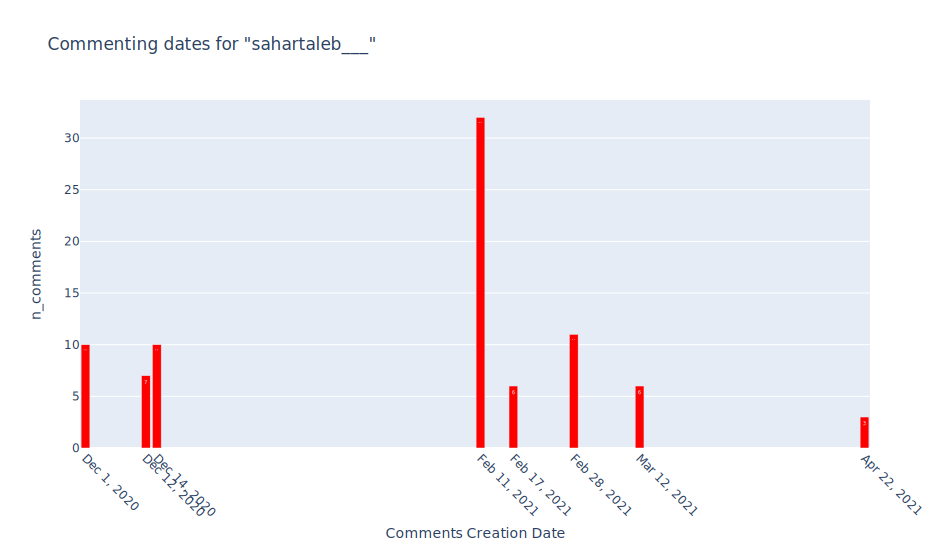

In [20]:
bar_peaks(sahar_dates[['date', 'n_comments']].head(8), 'Commenting dates for "sahartaleb___"')

In [21]:
df_comments[df_comments['date'].astype(str) == '2021-02-11'].query(' username == "sahartaleb___" ').media_id.value_counts()

2492755758204023808    3
2498869043148969472    2
2490584577367463936    1
2492027452445691392    1
2492336914704535040    1
2494198223288999936    1
2505814804507990016    1
2505383554626448384    1
2495954671539974656    1
2494507168440337408    1
2496378076043116032    1
2489496560649194496    1
2506842070675439104    1
2490186671405716480    1
2506551800805380608    1
2495231372371614208    1
2504697646352872960    1
2491363256112675840    1
2489867476675676672    1
2490904698988392448    1
2493058264813465088    1
2490053822983880192    1
2493531713109312512    1
2505114765196335616    1
2489494692992784896    1
2504351379026120704    1
2491609240163987968    1
2493784335989053952    1
2506106564236979200    1
Name: media_id, dtype: int64

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK